Spotify Recommendation System using Python

To create a Spotify recommendation system, I will be using a dataset that has been collected from Spotify. The dataset contains over 175,000 songs with over 19 features grouped by artist, year and genre. I will begin the task of building a music recommendation system with machine learning by importing the necessary Python libraries and dataset:

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()

data = pd.read_csv(Import Dataset)


Data Exploration

Let’s explore some key insights from this dataset so that we can select the best features for creating the recommendation system:

In [ ]:
data.info()

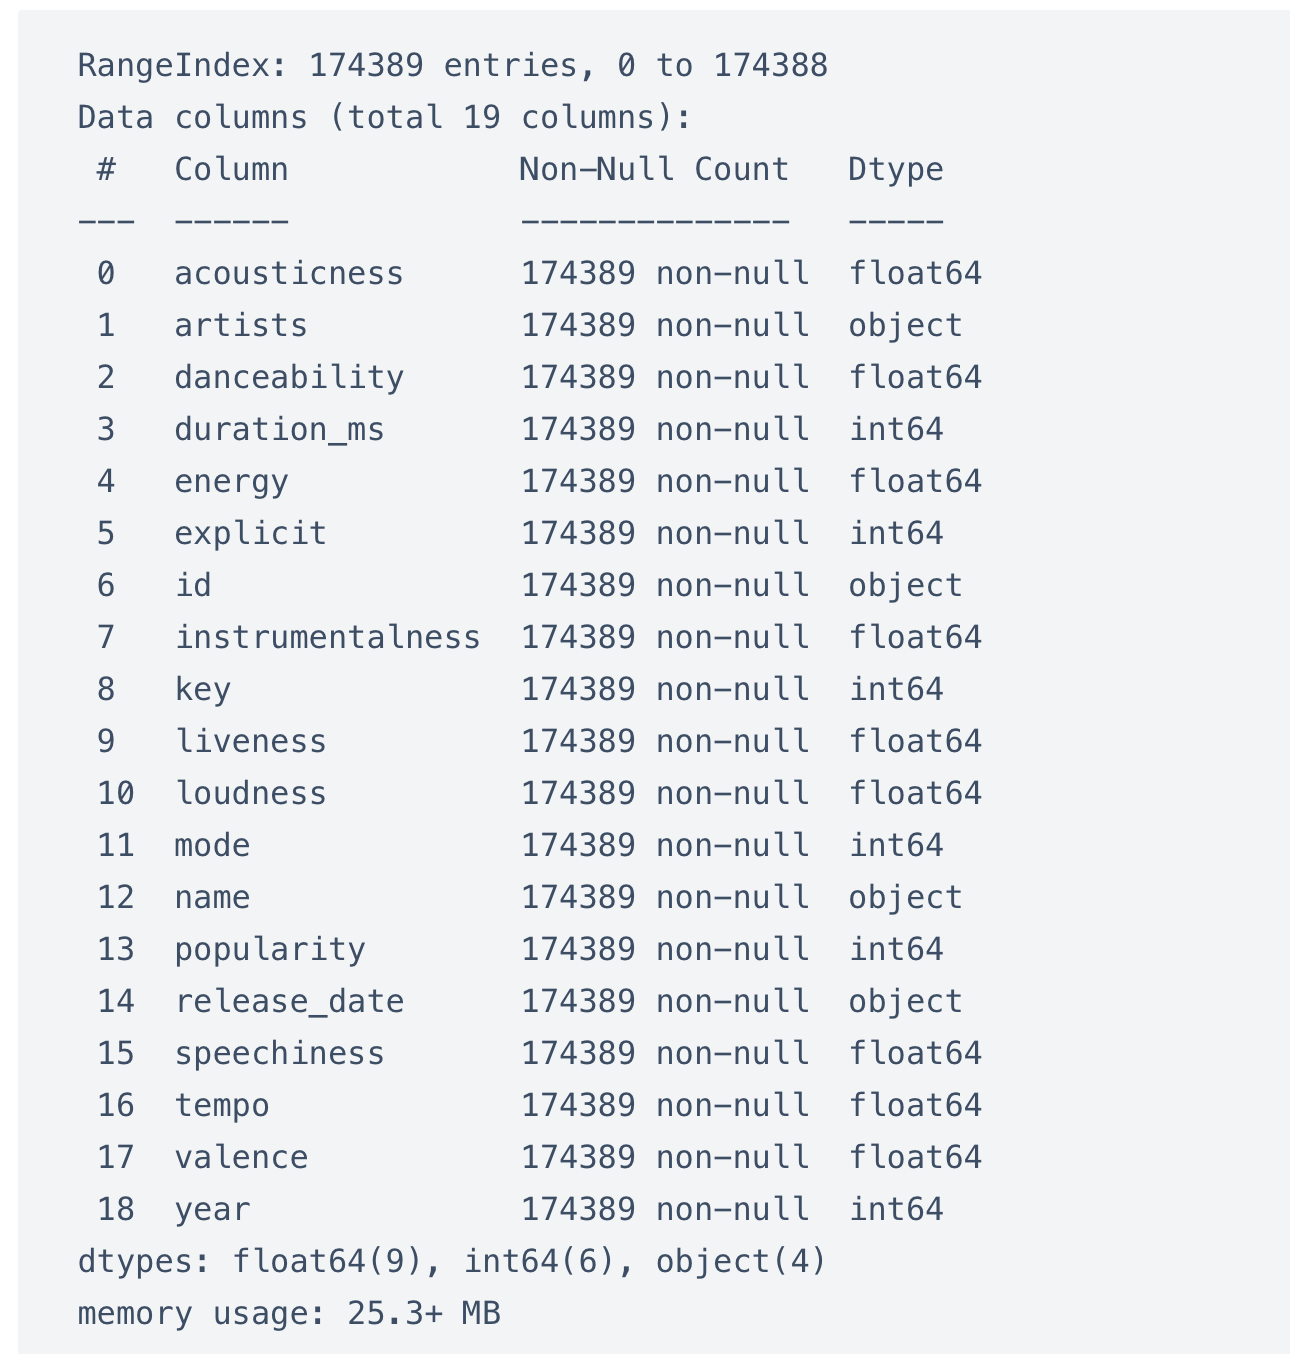

In [ ]:
data.isnull().sum()

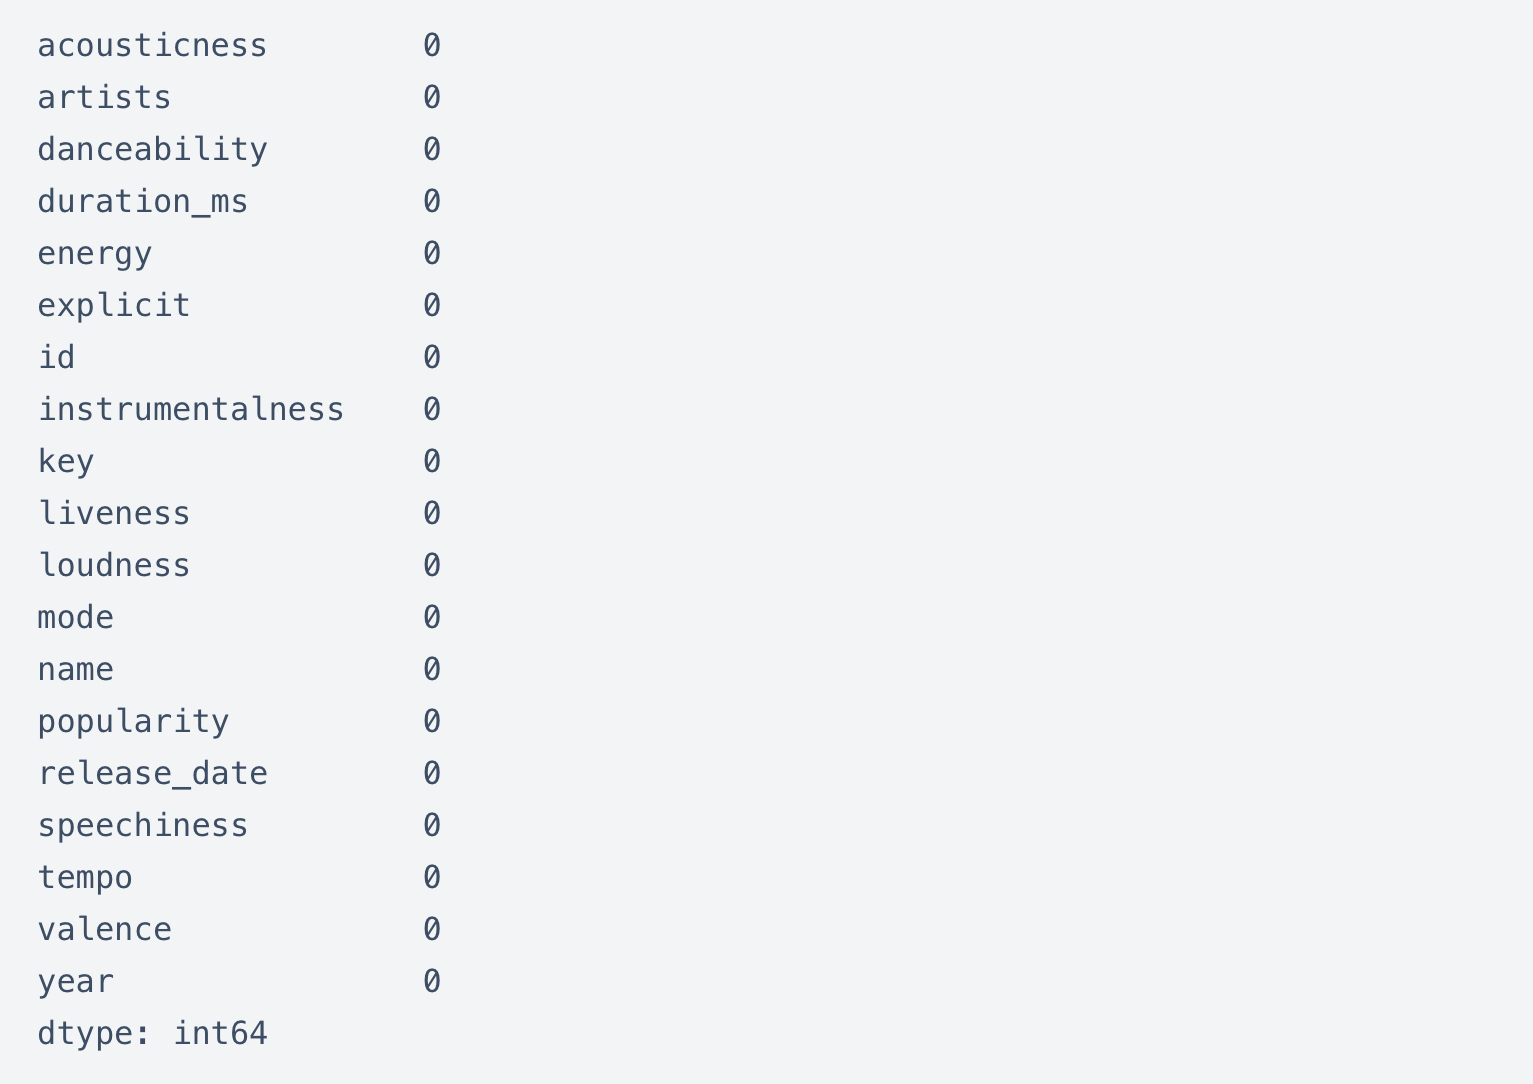

So the dataset does not contain any missing value. Now let’s have a look at the correlation between the feature. Here I will drop some columns such as ‘id’, ‘name’, ‘artists’, ‘release date’, and ‘year’ as these columns do not contribute much to the features of a song: 

In [ ]:
df = data.drop(columns=['id', 'name', 'artists', 'release_date', 'year'])

df.corr()

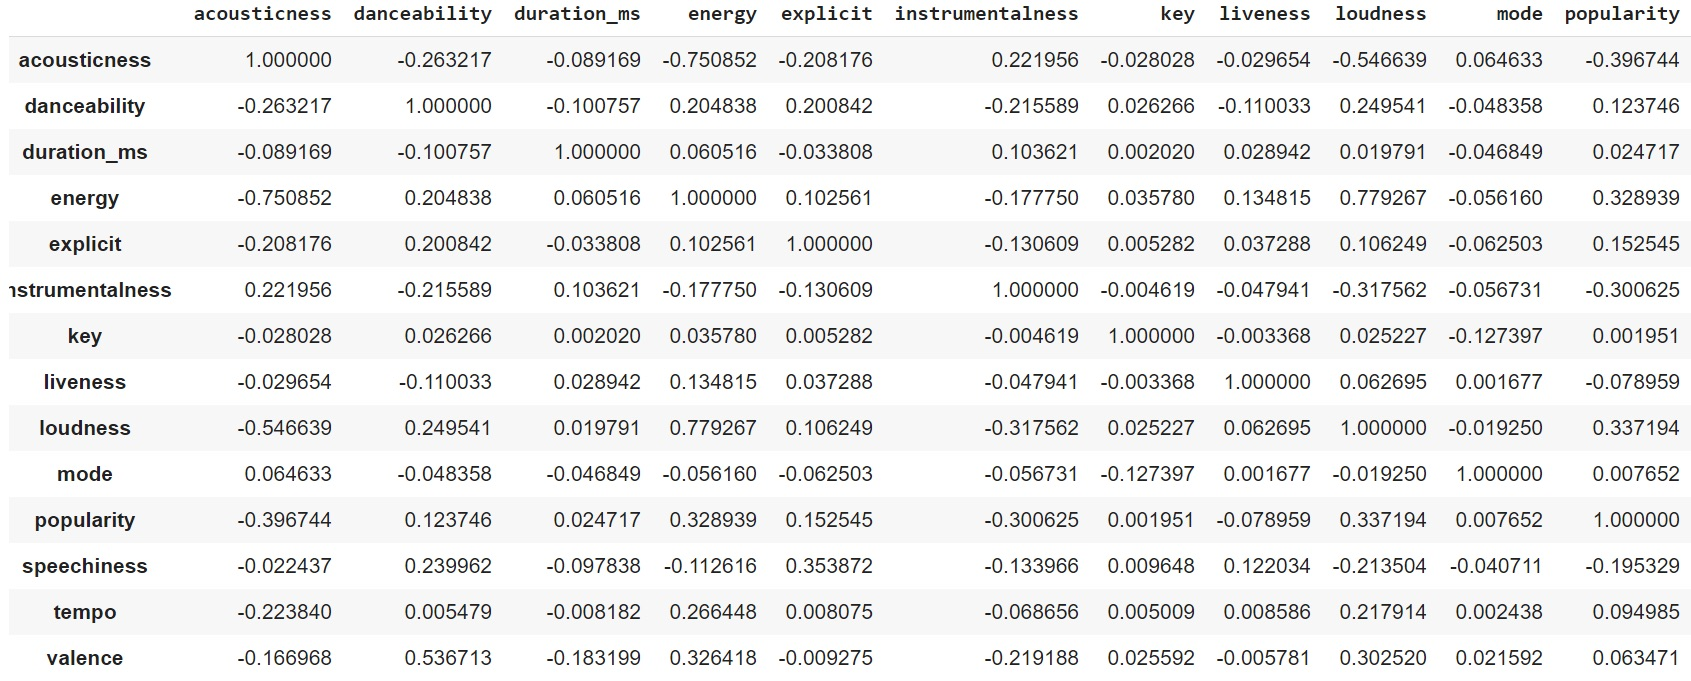

Data Transformation

Now I will normalize the dataset by using the MinMaxScaler method provided by the Scikit-learn library in Python. Here I will normalize all the numerical columns, for that, I will be selecting all the columns with int and float datatypes:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
normarization = data.select_dtypes(include=datatypes)
for col in normarization.columns:
    MinMaxScaler(col)

Songs of different genres may have similar characteristics which may affect the recommendation system. So I’m going to create a new feature here that will differentiate songs from different categories. For this task, I’ll use the K means clustering algorithm:

In [ ]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
features = kmeans.fit_predict(normarization)
data['features'] = features
MinMaxScaler(data['features'])

Spotify Recommendation System

Now we are ready with the data by performing all the necessary transformations to build the recommendation system. So let’s see how we can use the features in the dataset to recommend songs to the users:\

In [ ]:
class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend(self, songs, amount=1):
        distance = []
        song = self.dataset[(self.dataset.name.str.lower() == songs.lower())].head(1).values[0]
        rec = self.dataset[self.dataset.name.str.lower() != songs.lower()]
        for songs in tqdm(rec.values):
            d = 0
            for col in np.arange(len(rec.columns)):
                if not col in [1, 6, 12, 14, 18]:
                    d = d + np.absolute(float(song[col]) - float(songs[col]))
            distance.append(d)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['artists', 'name']
        return rec[columns][:amount]

recommendations = Spotify_Recommendation(data)
recommendations.recommend("Lovers Rock", 10)

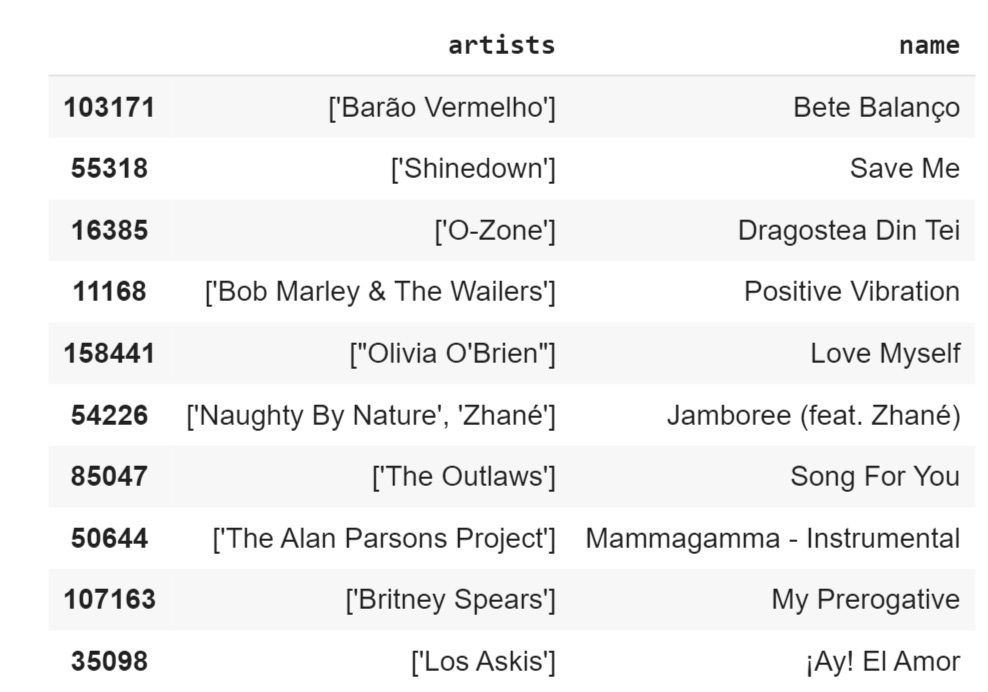